In [1]:
push!(LOAD_PATH, "$(pwd())/../src"); using PyPlot, StatsBase, Distributions, StochasticProcesses;

# Stochastic Calculus Exercises

Generalized Ito process: $ dy = f(t, y, dt, dB) $

## Stochastic Differential Equations

$ y(t) = \int_0^t f(t, y) dt + \int_0^t g(t, y) dB $ also written as $ dy = f(t, y) dt + g(t, y) dB $

### SDE Examples

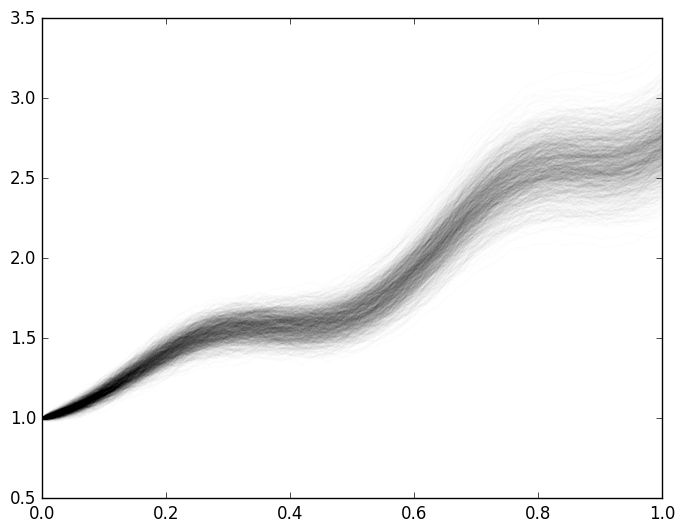

In [7]:
t=linspace(0.0, 1.0, 1000)
plot(t, cumsim(SDE((x, y)-> y .* (1+ sin(4 * pi * x)), (x, y)-> .1, 1.0), t, 1000), color=(0, 0, 0, .01));

## Ito Processes Properties

$dt dB = 0$

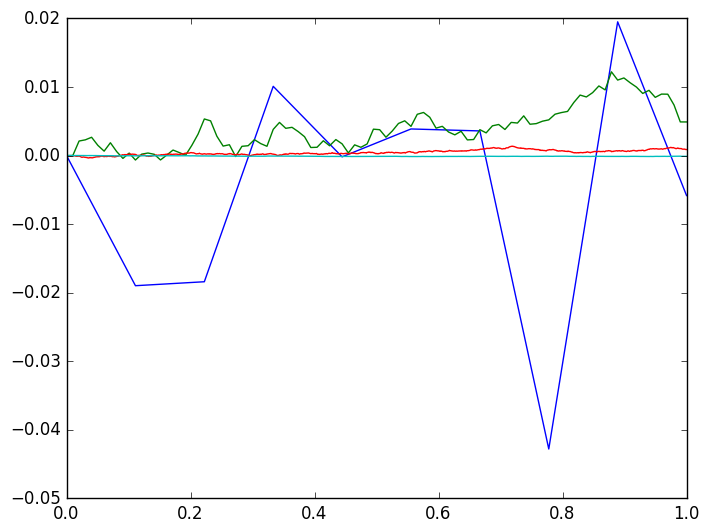

In [8]:
for n in [10, 100, 1000, 10000]
    t=linspace(0.,1.,n)
    plot(t, cumsim(ItoProcess((t,dt,b,db,y)->dt*db, .0), t))
end;

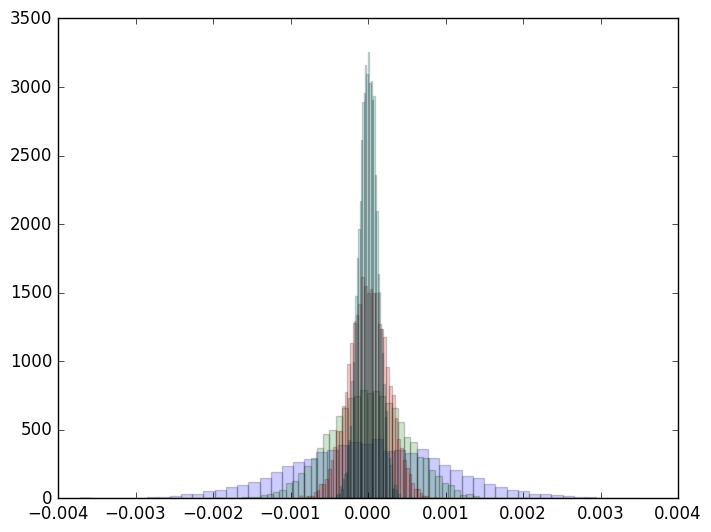

In [9]:
for n in [1000, 2000, 4000, 8000]
    t=linspace(0., 1., n)
    plt[:hist](sim(ItoProcess((t,dt,b,db,y)->dt*db, 0.), t, 10000), alpha=0.2, bins=50, normed=true);
end

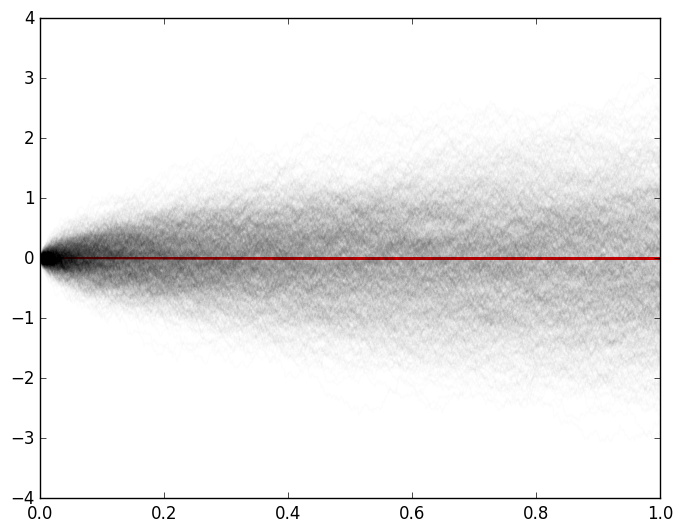

In [10]:
t=linspace(0., 1., 1000)
plot(t, cumsim(ItoProcess((t,dt,b,db,y)->dt*db, 0.), t, 1000), color=(1, 0, 0, .01));
plot(t, cumsim(BrownianMotion(), t, 1000), color=(0, 0, 0, .01));

$dB dB=t$

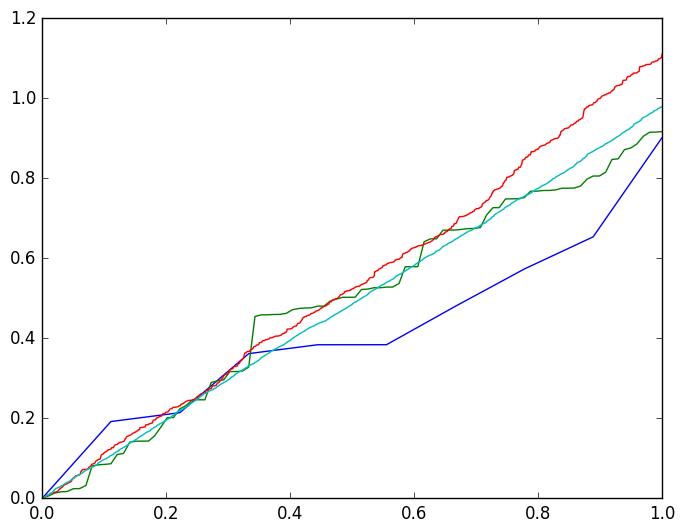

In [11]:
for (i, n) in enumerate([10, 100, 1000, 10000])
    t=linspace(0.,1,n)
    plot(t, cumsim(ItoProcess((t,dt,b,db,y)->db.^2, 0.), t))
end;

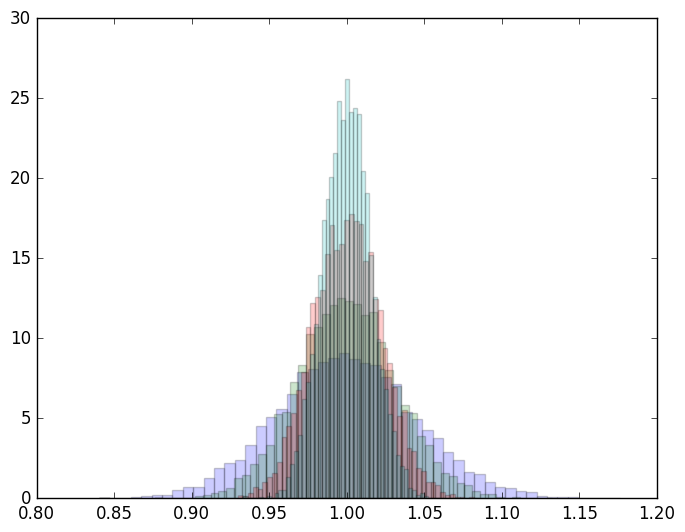

In [12]:
for n in [1000, 2000, 4000, 8000]
    t=linspace(0., 1., n)
    plt[:hist](sim(ItoProcess((t,dt,b,db,y)->db.^2, 0.), t, 10000), alpha=0.2, bins=50, normed=true);
end

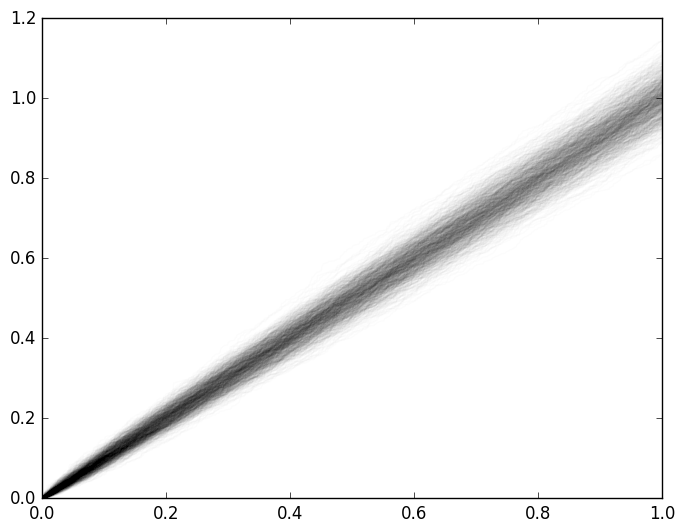

In [13]:
t=linspace(0., 1., 1000)
plot(t, cumsim(ItoProcess((t,dt,b,db,y)->db.^2, 0.), t, 1000), color=(0, 0, 0, .01));